In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.ndimage import median_filter

In [4]:
path = '/home/ikharitonov/Desktop/sleap_training/second_ellipse.003_20204321_343_5.analysis.csv'
df = pd.read_csv(path)
df

,track,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
0,NaN,0,NaN,30.098503,183.755737,NaN,135.012780,156.221634,NaN,269.288632,...,NaN,100.120031,188.017810,NaN,168.908319,123.859011,NaN,165.710764,189.323207,NaN
1,NaN,1,10.299853,29.928240,183.859467,0.906243,135.843323,156.039566,0.940850,270.218414,...,0.927483,101.874626,188.069046,0.924287,169.743134,124.028069,0.940773,167.756516,189.751663,0.902475
2,NaN,2,10.309512,29.864458,182.192261,0.885018,134.164429,156.009537,0.945554,271.867157,...,0.947799,100.180702,188.222885,0.960958,169.816925,123.965485,0.933206,167.715759,189.825195,0.883926
3,NaN,3,10.257852,29.822008,182.182114,0.881487,134.090759,156.008041,0.948546,271.752930,...,0.945182,100.114777,188.138855,0.955913,169.757278,123.968246,0.908748,168.040726,188.063324,0.953332
4,NaN,4,10.400537,29.853571,182.212814,0.875701,134.118958,155.955917,0.959233,271.813385,...,0.955354,100.022308,187.938156,0.971927,169.851013,123.924416,0.951482,168.148407,188.126663,0.892221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27838,NaN,27858,10.211238,32.080292,183.936462,0.913815,138.144318,162.170609,0.930936,272.095764,...,0.963983,128.212296,171.903412,0.841206,148.302811,152.153030,1.036520,148.014328,172.209427,0.954158
27839,NaN,27859,10.174915,32.060841,183.755219,0.903187,138.091232,162.178085,0.929457,272.132812,...,0.962262,128.228607,171.874573,0.835356,148.203110,152.207077,1.039286,147.910248,172.177383,0.967416
27840,NaN,27860,10.154961,32.028248,183.805023,0.925700,138.192947,162.201752,0.929702,272.211884,...,0.968969,128.317841,171.919479,0.839643,148.304581,152.245300,1.021459,148.010880,172.214355,0.975907
27841,NaN,27861,10.093005,32.011517,183.807724,0.943651,138.201584,162.166412,0.923574,272.136932,...,0.972047,129.711578,171.901993,0.842626,149.787750,152.162689,1.029769,148.099594,172.169250,0.962196


In [10]:
points = ['left', 'right', 'center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']

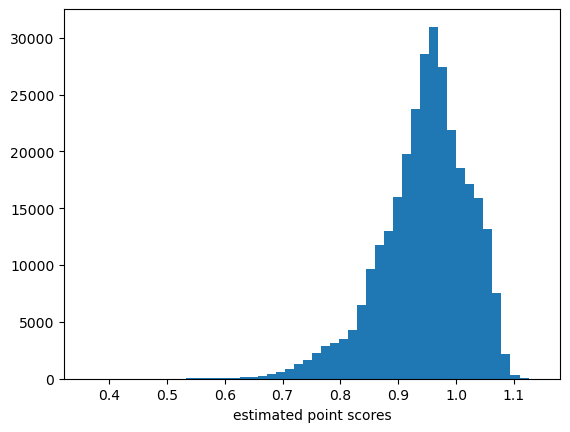

In [22]:
lll = []
for p in points:
    lll = lll + df[f'{p}.score'].to_list()
    
plt.hist(lll, bins=50)
plt.xlabel('estimated point scores')
plt.show()

In [86]:
def moving_average_smoothing(X,k):
    S = np.zeros(X.shape[0])
    for t in range(X.shape[0]):
        if t < k:
            S[t] = np.mean(X[:t+1])
        else:
            S[t] = np.sum(X[t-k:t])/k
    return S

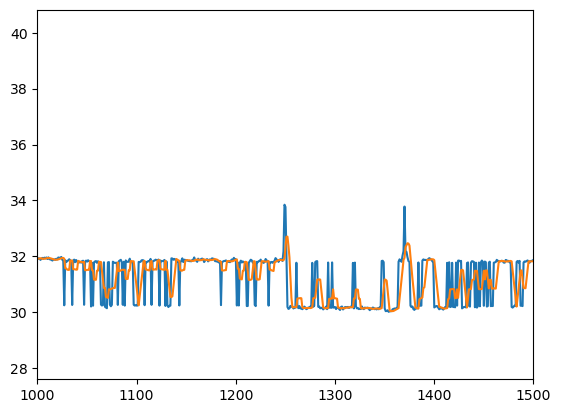

In [87]:
plt.plot(df['left.x'])
plt.plot(moving_average_smoothing(df['left.x'], 5))
plt.xlim([1000,1500])
plt.show()

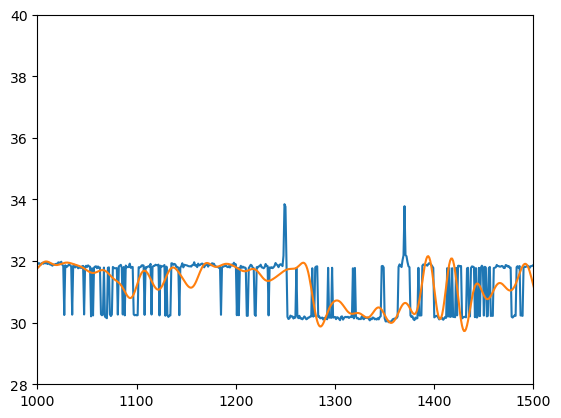

In [82]:
sos = signal.butter(10, 10, 'lp', fs=207.76, output='sos')
filtered = signal.sosfilt(sos, df['left.x'])

plt.plot(df['left.x'])
plt.plot(filtered)
plt.xlim([1000,1500])
plt.ylim([28,40])
plt.show()

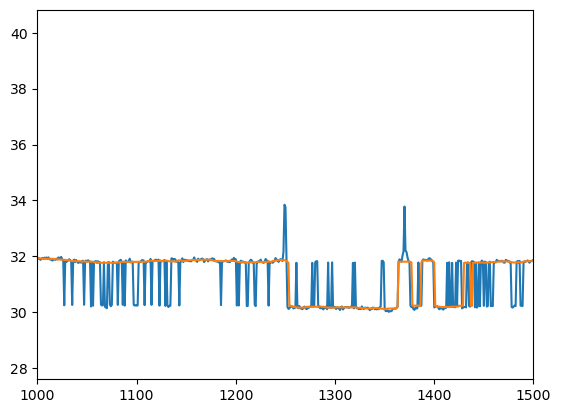

In [83]:
plt.plot(df['left.x'])
plt.plot(median_filter(df['left.x'], size=20))
plt.xlim([1000,1500])
plt.show()

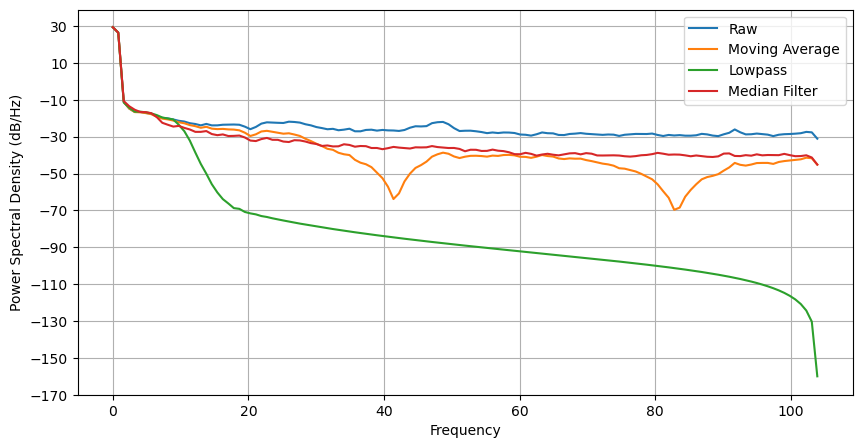

In [90]:
plt.figure(figsize=(10,5))
plt.psd(df['left.x'], Fs=207.76)
plt.psd(moving_average_smoothing(df['left.x'], 5), Fs=207.76)
plt.psd(filtered, Fs=207.76)
plt.psd(median_filter(df['left.x'], size=20), Fs=207.76)
plt.legend(['Raw', 'Moving Average', 'Lowpass', 'Median Filter'])
plt.show()